### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tune_scan_end_of_levelling_no_coupling"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  qx     qy     crossing_angle                      
lhcb1 62.305 60.309 250.0               base_collider   
             60.310 250.0               base_collider   
             60.311 250.0               base_collider   
             60.312 250.0               base_collider   
             60.313 250.0               base_collider   
...                                               ...   
      62.323 60.328 250.0               base_collider   
             60.329 250.0               base_collider   
      62.324 60.328 250.0               base_collider   
             60.329 250.0               base_collider   
      62.325 60.329 250.0               base_collider   

                                    normalized amplitude in xy-plane      qx  \
beam  qx     qy     crossing_angle                                             
lhcb1 62.305 60.309 250.0                                      4.062  62.305   
             60.310 250.0                                      4.031  62.305   
             60.311 250.0                                      4.062  62.305   
             60.312 250.0                                      4.000  62.305   
             60.313 250.0                                      4.062  62.305   
...                                                              ...     ...   
      62.323 60.328 250.0                                      4.000  62.323   
             60.329 250.0                                      4.000  62.323   
      62.324 60.328 250.0                                      4.000  62.324   
             60.329 250.0                                      4.000  62.324   
      62.325 60.329 250.0                                      4.000  62.325   

                                        qy   dqx   dqy  i_bunch_b1  \
beam  qx     qy     crossing_angle                                   
lhcb1 62.305 60.309 250.0           60.309  15.0  15.0       150.0   
             60.310 250.0           60.310  15.0  15.0       150.0   
             60.311 250.0           60.311  15.0  15.0       150.0   
             60.312 250.0           60.312  15.0  15.0       150.0   
             60.313 250.0           60.313  15.0  15.0       150.0   
...                                    ...   ...   ...         ...   
      62.323 60.328 250.0           60.328  15.0  15.0       150.0   
             60.329 250.0           60.329  15.0  15.0       150.0   
      62.324 60.328 250.0           60.328  15.0  15.0       150.0   
             60.329 250.0           60.329  15.0  15.0       150.0   
      62.325 60.329 250.0           60.329  15.0  15.0       150.0   

                                    i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  qx     qy     crossing_angle                                   
lhcb1 62.305 60.309 250.0                147.0     -60.0     -60.0   
             60.310 250.0                147.0     -60.0     -60.0   
             60.311 250.0                147.0     -60.0     -60.0   
             60.312 250.0                147.0     -60.0     -60.0   
             60.313 250.0                147.0     -60.0     -60.0   
...                                        ...       ...       ...   
      62.323 60.328 250.0                147.0     -60.0     -60.0   
             60.329 250.0                147.0     -60.0     -60.0   
      62.324 60.328 250.0                147.0     -60.0     -60.0   
             60.329 250.0                147.0     -60.0     -60.0   
      62.325 60.329 250.0                147.0     -60.0     -60.0   

                                    num_particles_per_bunch  crossing_angle  
beam  qx     qy     crossing_angle                                           
lhcb1 62.305 60.309 250.0                      2.200000e+11           250.0  
             60.310 250.0                      2.200000e+11           250.0  
             60.311 250.0                      2.200000e+11           250.0  
             60.312 250.0               

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,4.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.031,4.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.062,4.031,5.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.000,4.500,4.938,5.781,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.062,4.938,5.281,5.656,5.625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.125,4.656,5.500,5.562,5.750,5.406,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.000,4.250,5.906,5.625,5.844,5.750,5.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.031,5.531,5.906,5.656,5.562,5.844,5.781,5.969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.188,5.250,5.594,5.750,5.719,5.531,5.281,5.500,5.688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

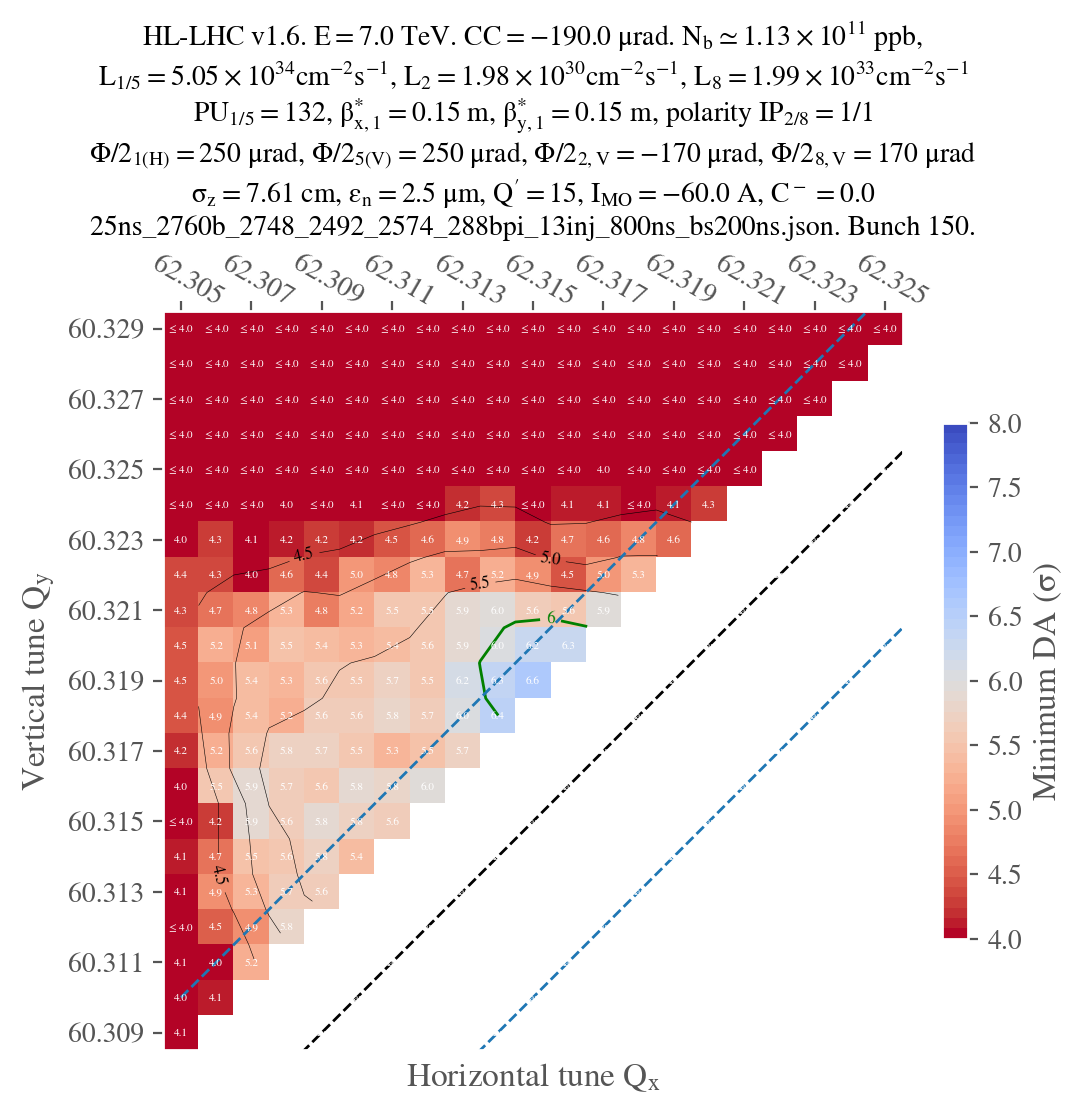

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flathv",
    betx=0.15,
    bety=0.15,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
